# Comparison methods

## Imports

In [1]:
import os
from PIL import Image
import csv
import pandas as pd
import time
import hashlib
from pywaffle import Waffle

# Comparison methods functions
import sys; sys.path.append("./libraries/")
from libraries.comparison_methods import *

In [2]:
folder_pairs = [
    ("../data/duplicate_data/ISIC-2017-1-FOLD", "../data/original_data/ISIC-2017-Challenge"), 
    ("../data/duplicate_data/ISIC-2018", "../data/original_data/ISIC-2018-Challenge"),
    ("../data/duplicate_data/ISIC-2019-Preprocessed-Dataset", "../data/original_data/ISIC-2019-Challenge")
]

subfolders = ["train", "test", "val"]

all_comparison_results = {}
all_duplicate_pairs = []
all_hashes = []

In [3]:
for pair_index, (folder_duplicate, folder_original) in enumerate(folder_pairs, start=1):
    result_description = f"Pair {pair_index} ({folder_duplicate} vs {folder_original})"
    result_description_update = result_description.replace("../data/duplicate_data/", "Duplicate Data - ").replace("../data/original_data/", "Original Data - ")

    # compare image counts and filenames
    comparison_results = compare_image_counts_and_filenames(folder_duplicate, folder_original)
    # compare image dimensions and sizes
    comparison_results = compare_image_dimensions_and_sizes(folder_duplicate, folder_original, result_description, result_description_update, comparison_results)

    all_comparison_results[pair_index] = (comparison_results, folder_original, folder_duplicate)

    print(f"\n\n ## {result_description_update} ##")
    print("\n #### IMAGE FILE NAME, SIZE AND DIMENSION COMPARISON #### \n")
    
    for subfolder, details in comparison_results.items():
        print(f"  {subfolder.capitalize()} -")
        print(f"    Duplicate Folder Image Count: {details['Duplicate Folder']}")
        print(f"    Original Folder Image Count: {details['Original Folder']}")
        print(f"    Difference in Image Count: {details['Difference in Count']}")
        print(f"    Match: {details['Match']}")
        print(f"    Common Images ({len(details['Common Files'])}): {', '.join(details['Common Files'])}")
        # print(f"    Percentage of common images: {round((len(details['Common Files']) / (details['Duplicate Folder'] + details['Duplicate Folder'])),2) * 100}%")
        print(f"    Images Missing in Duplicate Folder ({len(details['Missing images in Duplicate Folder'])}): {', '.join(details['Missing images in Duplicate Folder'])}")
        print(f"    Images Missing in Original Folder ({len(details['Missing images in Original Folder'])}): {', '.join(details['Missing images in Original Folder'])}")
        print(f"    Mismatched Dimensions Count on Common Images: {details['Mismatched Dimensions Count']}")
        print(f"    Mismatched Sizes on Common Images: {details['Mismatched Sizes Count']}")
            
    duplicate_dataset_name = os.path.basename(folder_duplicate)
    original_dataset_name = os.path.basename(folder_original)

    hashes_duplicate = compute_file_hashes(folder_duplicate, duplicate_dataset_name)
    hashes_original = compute_file_hashes(folder_original, original_dataset_name)
    hashes_df = pd.DataFrame(hashes_duplicate + hashes_original)
    all_hashes.extend(hashes_duplicate + hashes_original)

    # compare hashes to find duplicates
    duplicate_pairs = compare_hashes_for_pair(hashes_df, duplicate_dataset_name, original_dataset_name)

    all_duplicate_pairs.extend(duplicate_pairs)
    
    print("\n#### HASHING COMPARISON #### \n")
    duplicates_df = pd.DataFrame(duplicate_pairs)
    csv_filename = f"../data/hashes/duplicate_images_{duplicate_dataset_name}_vs_{original_dataset_name}.csv"
    duplicates_df.to_csv(csv_filename, index=False)
    print(f"    Total duplicate pairs found between {duplicate_dataset_name} and {original_dataset_name} using the hashing comparison: {len(duplicates_df)}")
    
    print("\n#### PIXEL BY PIXEL COMPARISON #### \n")
    for subfolder in subfolders:
        perform_pixel_comparison(folder_duplicate, folder_original, pair_index, subfolder)



 ## Pair 1 (Duplicate Data - ISIC-2017-1-FOLD vs Original Data - ISIC-2017-Challenge) ##

 #### IMAGE FILE NAME, SIZE AND DIMENSION COMPARISON #### 

  Train -
    Duplicate Folder Image Count: 821
    Original Folder Image Count: 4000
    Difference in Image Count: 3179
    Match: False
    Common Images (599): ISIC_0012237.jpg, ISIC_0014805.jpg, ISIC_0013797.jpg, ISIC_0013174.jpg, ISIC_0004166.jpg, ISIC_0014502.jpg, ISIC_0012773.jpg, ISIC_0012150.jpg, ISIC_0013238.jpg, ISIC_0009925.jpg, ISIC_0014726.jpg, ISIC_0010021.jpg, ISIC_0013800.jpg, ISIC_0012710.jpg, ISIC_0015153.jpg, ISIC_0014174.jpg, ISIC_0014317.jpg, ISIC_0013079.jpg, ISIC_0014843.jpg, ISIC_0013806.jpg, ISIC_0013802.jpg, ISIC_0013114.jpg, ISIC_0013341.jpg, ISIC_0013487.jpg, ISIC_0012982.jpg, ISIC_0000016.jpg, ISIC_0000274.jpg, ISIC_0011227.jpg, ISIC_0014291.jpg, ISIC_0014708.jpg, ISIC_0011363.jpg, ISIC_0000063.jpg, ISIC_0000549.jpg, ISIC_0010371.jpg, ISIC_0000483.jpg, ISIC_0014032.jpg, ISIC_0013625.jpg, ISIC_0014654.jpg, 

## Venn Diagrams for the Image filename comparison results

/Users/veronhoxha/Desktop/Research Project/duplicate-datasets/.venv/lib/python3.12/site-packages/matplotlib_venn/_util.py:32: UserWarning: venn2_unweighted is deprecated. Use venn2 with the appropriate layout_algorithm instead.
  warnings.warn(


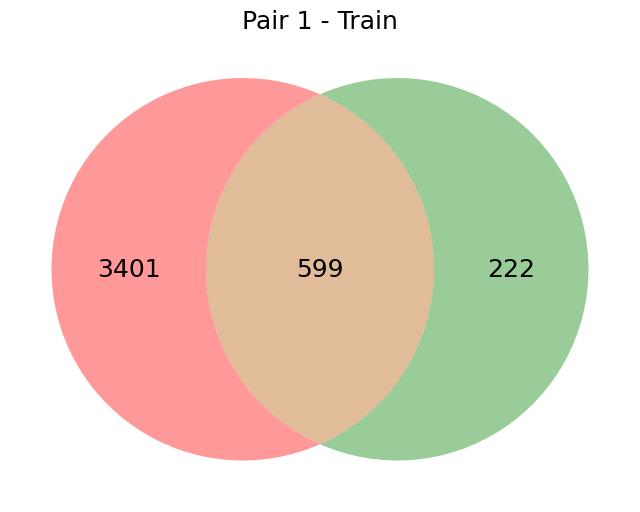

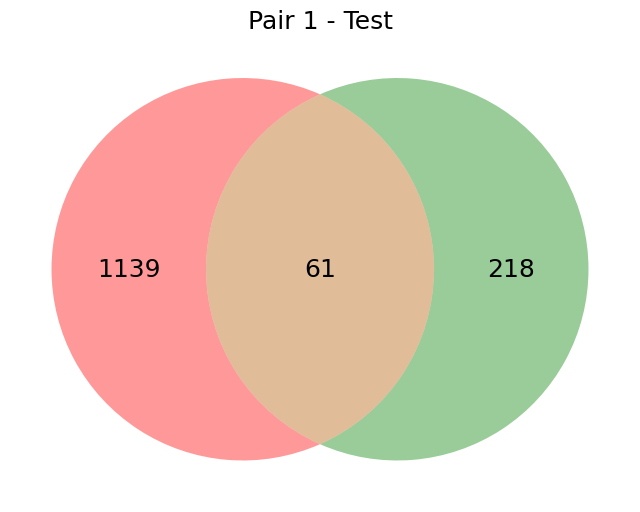

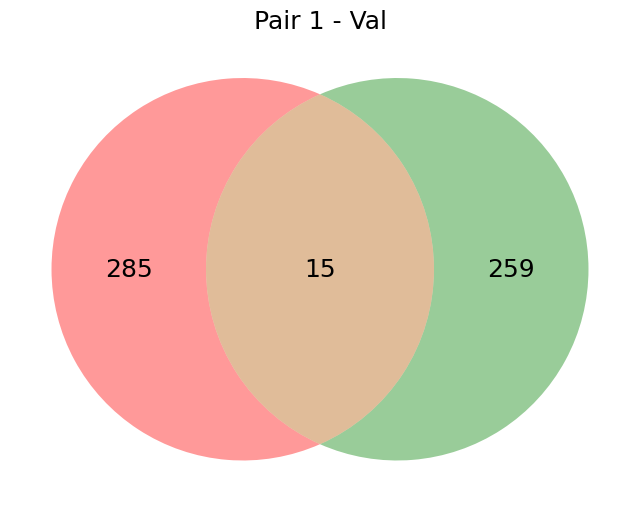

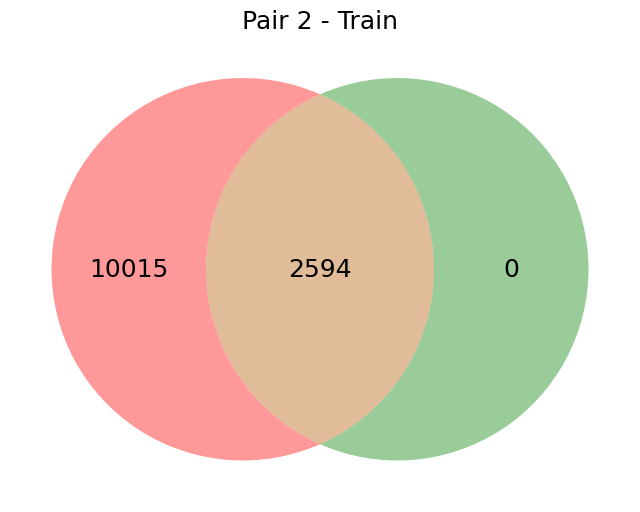

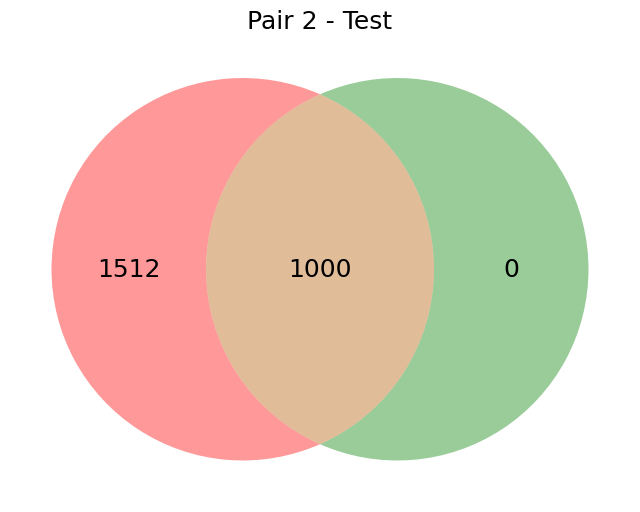

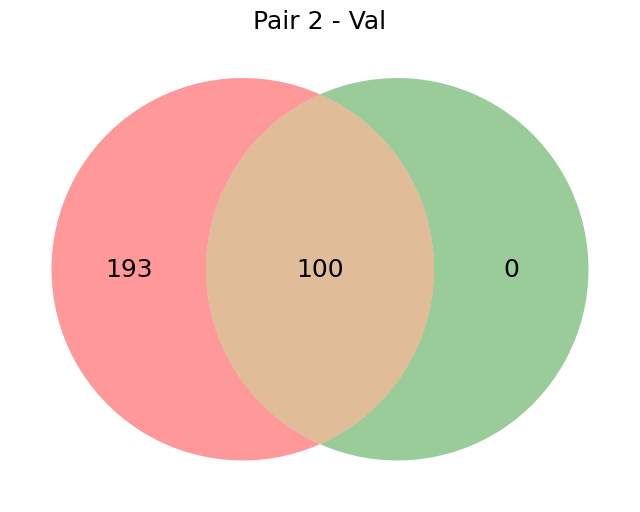

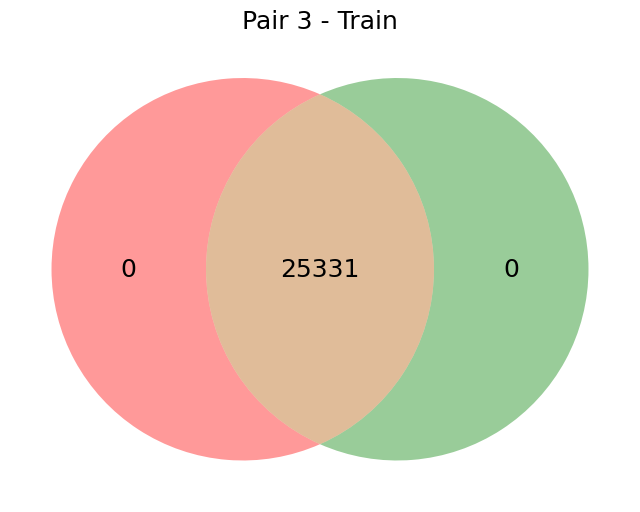

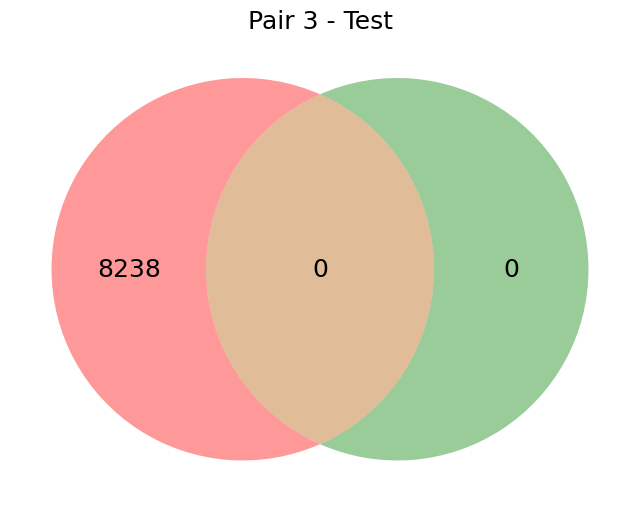

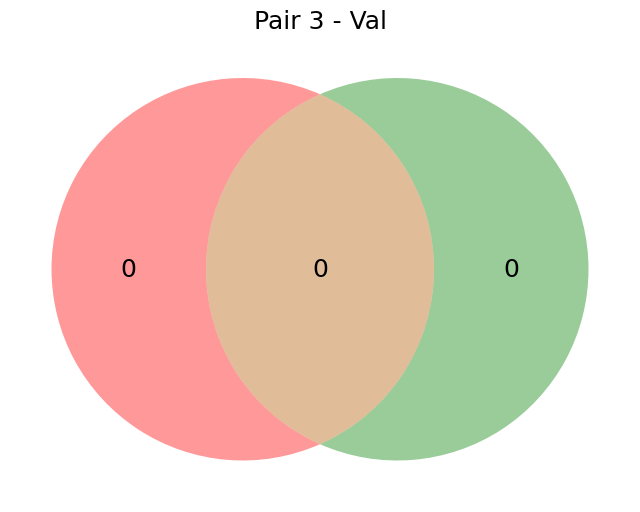

In [4]:
plot_venn_for_all_pairs(all_comparison_results)

## Waffle plot for the Image filename comparison results

<Figure size 640x480 with 0 Axes>

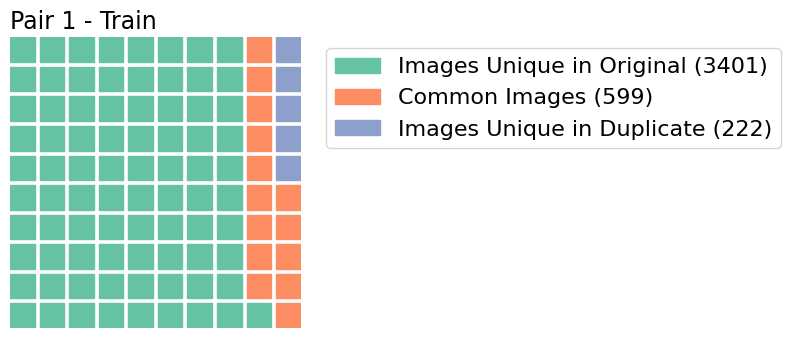

<Figure size 640x480 with 0 Axes>

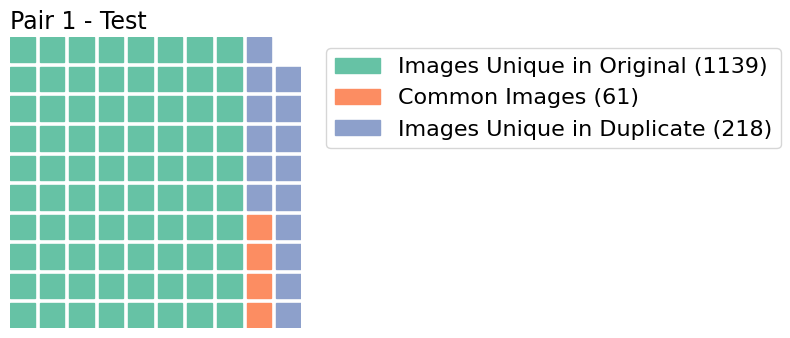

<Figure size 640x480 with 0 Axes>

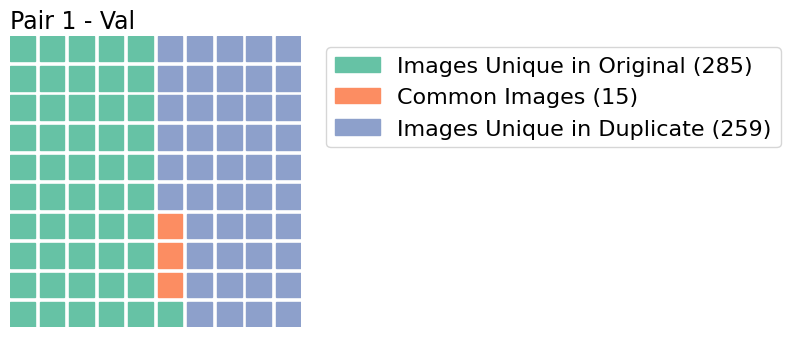

<Figure size 640x480 with 0 Axes>

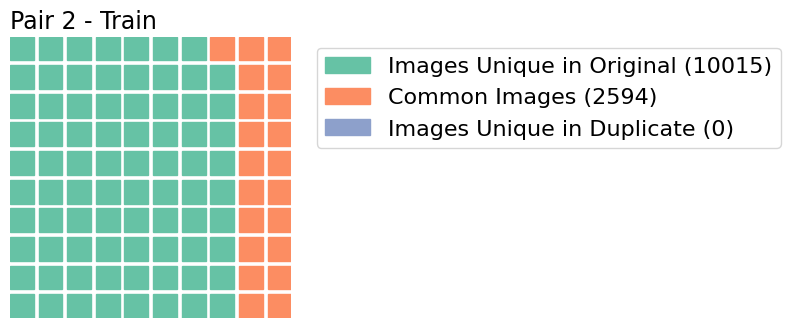

<Figure size 640x480 with 0 Axes>

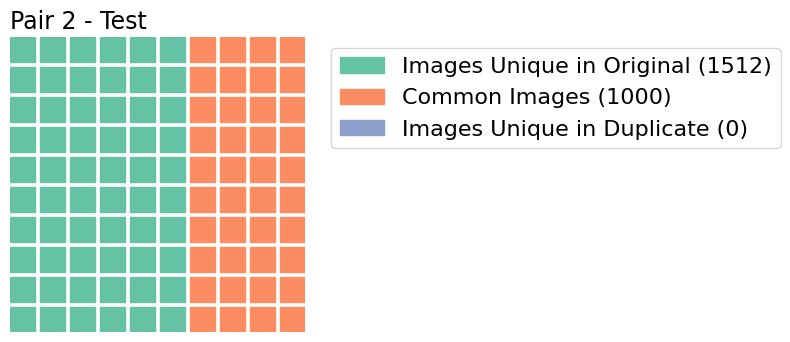

<Figure size 640x480 with 0 Axes>

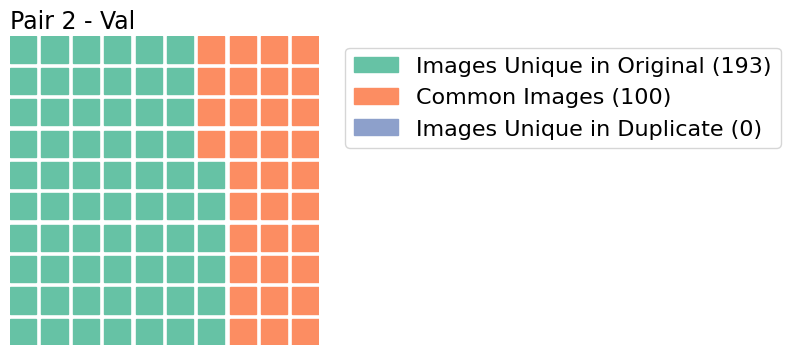

<Figure size 640x480 with 0 Axes>

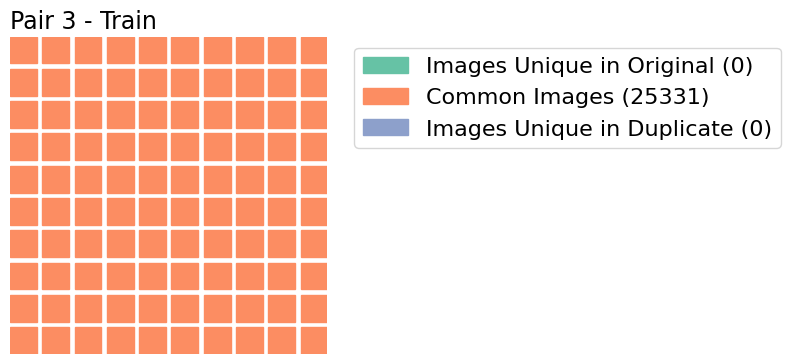

<Figure size 640x480 with 0 Axes>

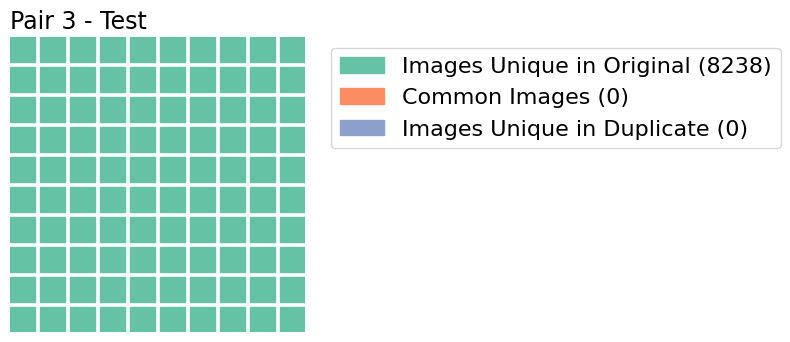

<Figure size 640x480 with 0 Axes>

In [5]:
plot_waffle_for_all_pairs(all_comparison_results)

## Hashes

In [6]:
hashes_df = pd.DataFrame(all_hashes)
hashes_df.to_csv("../data/hashes/file_hashes_by_pair.csv", index=False)
print(f"Total images hashed: {len(hashes_df)}")

Total images hashed: 84882


In [7]:
all_duplicates_df = pd.DataFrame(all_duplicate_pairs)
all_duplicates_df.to_csv("../data/hashes/all_duplicate_images_pairs.csv", index=False)
print(f"Total duplicate pairs found across all dataset pairs with hashing comparison: {len(all_duplicates_df)}")

Total duplicate pairs found across all dataset pairs with hashing comparison: 5075
